# Introduction to AI Programming

## Set-Up and Imports

In [1]:
import random
from tqdm import tqdm
import numpy as np

## Problem Definition
**Task 1**: Solve for $a$, $b$ and $c$ using the following equations:
$$
\begin{align}
 a + b + c &= 9\\
 2a + 4b + 3c &= 9\\
 23a + 62b + c &= 10\\
 \end{align}
 $$

In [2]:
X = [
    [1, 1, 1],
    [2, 4, 3],
    [23, 62, 1]
]

y = [9, 9, 10]

## The Actual Solution

One can solve a system of linear equations by inverting the coefficient matrix and multiplying the matrix with the outputs (you will learn this in Y2 math if you haven't already).

In [3]:
np.linalg.inv(X) @ y

array([13.24096386, -4.75903614,  0.51807229])

## Using Linear Regression

We start by defining $m$ values at random, which represent $a$, $b$ and $c$.

In [4]:
soln = [random.random() for i in range(3)]
soln

[0.2830302698109701, 0.9617920183096833, 0.6131517096630744]

We now define our parameters. $\alpha$ is the Learning Rate.

In [5]:
alpha = 0.001
n = len(y)
m = 3

In [6]:
for epoch in tqdm(range(500000)): # We run the loop 500,000 times!
    soln_new = [i for i in soln]
    for i in range(n):
        h = 0
        for j in range(m):
            h += X[i][j] * soln[j]
        for j in range(m):
            soln_new[j] += (alpha / n) * X[i][j] * (y[i] - h)
        
    soln = soln_new

print(soln)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:11<00:00, 42951.17it/s]

[13.240963855373089, -4.759036144560463, 0.5180722891676119]


### What happens if I set $\alpha$ to be too large?

In [7]:
alpha = 0.01
soln = [random.random() for i in range(3)]
soln

[0.4176338036949826, 0.31674977456584574, 0.49140096334215044]

In [8]:
for epoch in tqdm(range(100)):
    soln_new = [i for i in soln]
    for i in range(n):
        h = 0
        for j in range(m):
            h += X[i][j] * soln[j]
        for j in range(m):
            soln_new[j] += (alpha / n) * X[i][j] * (y[i] - h)
        
    soln = soln_new

print(soln)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 28324.58it/s]

[3.3567490163575955e+112, 9.030056003891683e+112, 1.7741691039660442e+111]


## Using Vectorization to Speed Up

In [9]:
%%timeit -n 5 -r 1
X = [
    [1, 1, 1],
    [2, 4, 3],
    [23, 62, 1]
]

y = [9, 9, 10]

soln = [random.random() for i in range(3)]

alpha = 0.001
n = len(y)
m = 3

for epoch in tqdm(range(500000)): # We run the loop 500,000 times!
    soln_new = [i for i in soln]
    for i in range(n):
        h = 0
        for j in range(m):
            h += X[i][j] * soln[j]
        for j in range(m):
            soln_new[j] += (alpha / n) * X[i][j] * (y[i] - h)
        
    soln = soln_new

print(soln)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:09<00:00, 51191.61it/s]


[13.240963855373499, -4.759036144560614, 0.5180722891675333]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:05<00:00, 95312.37it/s]


[13.240963855372804, -4.75903614456036, 0.5180722891676707]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:05<00:00, 91680.75it/s]


[13.24096385537446, -4.7590361445609695, 0.5180722891673301]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:05<00:00, 87446.82it/s]


[13.240963855375846, -4.759036144561476, 0.518072289166982]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:05<00:00, 95758.28it/s]

[13.240963855374401, -4.759036144560947, 0.518072289167342]
6.29 s ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


In [11]:
%%timeit -n 5 -r 1
X = np.array([
    [1, 1, 1],
    [2, 4, 3],
    [23, 62, 1]
])

y = np.array([9, 9, 10])

soln = np.random.randn(3)#[random.random() for i in range(3)]

alpha = 0.001
n = len(y)
m = 3

for epoch in tqdm(range(500000)):
    h = X @ soln
    soln += ((alpha / n) * (X.T @ (y - h)))

print(soln)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:05<00:00, 91722.31it/s]


[13.24096386 -4.75903614  0.51807229]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:05<00:00, 98288.84it/s]


[13.24096386 -4.75903614  0.51807229]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:05<00:00, 95204.02it/s]


[13.24096386 -4.75903614  0.51807229]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:05<00:00, 95856.55it/s]


[13.24096386 -4.75903614  0.51807229]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:05<00:00, 94152.08it/s]

[13.24096386 -4.75903614  0.51807229]
5.27 s ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


## Using Scikit Learn Instead

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = False)
model.fit(X, y)
model.coef_

array([13.24096386, -4.75903614,  0.51807229])

## Task 2

In [16]:
from sklearn.datasets import load_diabetes

In [18]:
diabetes_ds = load_diabetes()
diabetes_ds.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [19]:
X = diabetes_ds.data
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [21]:
y = diabetes_ds.target
y[:4]

array([151.,  75., 141., 206.])

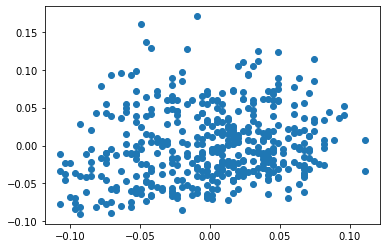

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X[:,  0], X[:, 2])

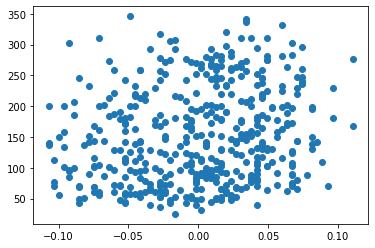

In [25]:
plt.scatter(X[:,  0],y)

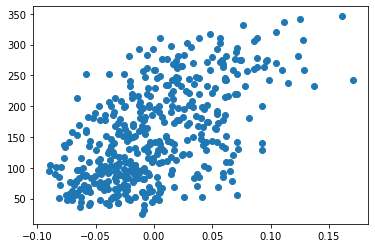

In [26]:
plt.scatter(X[:,  2],y)

In [27]:
alpha = 0.001
n = len(y)
m = len(diabetes_ds.feature_names)

soln = np.random.randn(m)

for epoch in tqdm(range(500000)):
    h = X @ soln
    soln += ((alpha / n) * (X.T @ (y - h)))

print(soln)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:25<00:00, 19946.29it/s]

[  31.29131501 -120.76159854  401.79027135  261.80243626   -6.87481128
  -56.50501258 -194.30581743  140.52038019  337.33530672  141.88150915]


In [28]:
model = LinearRegression(fit_intercept = False)
model.fit(X, y)
model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])